MODULARITY: 0.408923601549


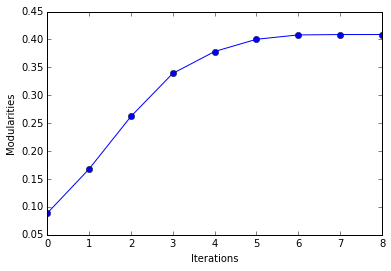

NMI: 0.509797375313
1033
1460
1398


c:\Users\frole\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


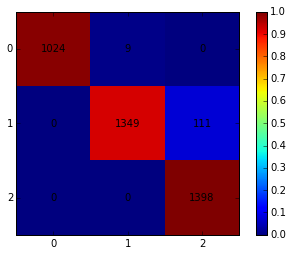

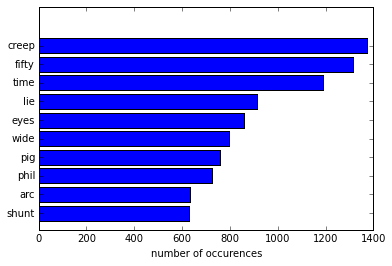

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
from coclust.CoclustMod import CoclustMod
import numpy as np
from sklearn.metrics import confusion_matrix

from coclust.utils import initialization
from coclust.utils.evaluation import plot_confusion_matrix ,plot_top_terms

# Retrieve the Classic3  document-term matrix from a matlab file
file_name = "../datasets/classic3.mat"
matlab_dict = loadmat(file_name)


X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
model = CoclustMod(n_clusters=3)
model.fit(X)


# Plot modularities 
print("MODULARITY:",model.modularity)
plt.plot(model.modularities,marker='o')
plt.ylabel('Modularities')
plt.xlabel('Iterations')
plt.show()


# plot cm
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
print("NMI:", nmi(true_row_labels, predicted_row_labels))
true_row_labels = matlab_dict['labels'].flatten()
predicted_row_labels = sorted(model.row_labels_)
cm=confusion_matrix(true_row_labels , predicted_row_labels)
plot_confusion_matrix(cm, colormap=plt.cm.jet, labels='012')


# plot terms
terms = [str(x[0][0]) for x in matlab_dict['ms']]
plot_top_terms(model, X, terms, n_cluster=1)



In [3]:
import inspect

In [ ]:
inspect.getsource()